In [1]:
!git pull

Already up to date.


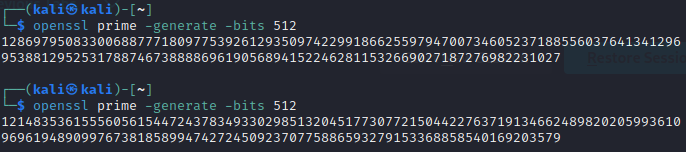

In [2]:
import sympy
from math import gcd

#512 bit p and q (currently if i use these values it does not work)
p=12869795083300688777180977539261293509742299186625597947007346052371885560376413412969538812952531788746738888696190568941522462811532669027187276982231027
q=12148353615556056154472437834933029851320451773077215044227637191346624898202059936109696194890997673818589947427245092370775886593279153368858540169203579


# 256 bit p and q 
# p=115096021335331515138079718926148913277222974442989348089954919407811592448323
# q=114183476231108931531313229995857392724889080745455769463683936194846802520503

N = p * q
phi_N = (p - 1) * (q - 1)
e = 65537 #, the is the standard value usually used

print(e)

# Message to be encrypted
message = 12

print(f"Original message = {message}")
print("")

# Choose a private exponent (d) such that d * e ≡ 1 mod phi(N)
d = sympy.mod_inverse(e, phi_N)

# Display the public and private keys
public_key = (e, N)
private_key = (d, N)

print("Public Key:", public_key)
print("")
print("Private Key:", private_key)
print("")

# Encrypt the message
encrypted_message = pow(message, e, N)
print("")
print("Encrypted Message:", encrypted_message)
print("")

# Decrypt the message
decrypted_message = pow(encrypted_message, d, N)
print("Decrypted Message:", decrypted_message)
print("")


65537
Original message = 12

Public Key: (65537, 156346821631681477401124926750495286740792129458553032234494386688081624853288356506937772456803832811784712148005027115830528920515787519711656110036850378116016773959834119229061429110509500800467962987062370248424826070636629116147537042363934287867297000405976659980678829286591117944009130578389173245633)

Private Key: (139501911008044403505015200827959204532623717323318844514461964325072265970686634040308423977052061087659228032512046105639654075653160672637728347201044619798753888028567730177967845755510638376836588248619355283122663070066221346125636134274182564949558362841919374017828773416610806370718090369206426101617, 156346821631681477401124926750495286740792129458553032234494386688081624853288356506937772456803832811784712148005027115830528920515787519711656110036850378116016773959834119229061429110509500800467962987062370248424826070636629116147537042363934287867297000405976659980678829286591117944009130578389173245633)


E

### Wiener Attack

In [3]:
import sympy
from math import gcd

#512 bit p and q (currently if i use these values it does not work)
p=12869795083300688777180977539261293509742299186625597947007346052371885560376413412969538812952531788746738888696190568941522462811532669027187276982231027
q=12148353615556056154472437834933029851320451773077215044227637191346624898202059936109696194890997673818589947427245092370775886593279153368858540169203579


# 256 bit p and q 
# p=115096021335331515138079718926148913277222974442989348089954919407811592448323
# q=114183476231108931531313229995857392724889080745455769463683936194846802520503

N = p * q
phi_N = (p - 1) * (q - 1)
d = 17
e = sympy.mod_inverse(d, phi_N)

#check if this is the required `e` value
if gcd(e, phi_N)==1:
    print(f"e = {e} is a valid value for e")
    print("")

# Message to be encrypted
message = 12

print(f"Original message = {message}")
print("")

# Display the public and private keys
public_key = (e, N)
private_key = (d, N)

print("Public Key:", public_key)
print("")
print("Private Key:", private_key)
print("")

# Encrypt the message
encrypted_message = pow(message, e, N)
print("")
print("Encrypted Message:", encrypted_message)
print("")

# Decrypt the message
decrypted_message = pow(encrypted_message, d, N)
print("Decrypted Message:", decrypted_message)
print("")


e = 36787487442748582917911747470704773350774618696130125231645738044254499965479613295750064107483254779243461681883535791960124451886067651696860261185141259552439547083079808841328483509690856408874589008058677414927431141676746008864514814853865045726549278841680126245886474585468638384043937537075769837889 is a valid value for e

Original message = 12

Public Key: (36787487442748582917911747470704773350774618696130125231645738044254499965479613295750064107483254779243461681883535791960124451886067651696860261185141259552439547083079808841328483509690856408874589008058677414927431141676746008864514814853865045726549278841680126245886474585468638384043937537075769837889, 156346821631681477401124926750495286740792129458553032234494386688081624853288356506937772456803832811784712148005027115830528920515787519711656110036850378116016773959834119229061429110509500800467962987062370248424826070636629116147537042363934287867297000405976659980678829286591117944009130578389173245633)

Priva

In [4]:
from sympy import *

def get_convergents(e):
    n = [] 
    d = [] 
    
    
    #Recurrence relation for convergence
    for i in range(len(e)):
        if i == 0:
            ni = e[i]
            di = 1
        elif i == 1:
            ni = e[i]*e[i-1] + 1
            di = e[i]
        else: # i > 1 
            ni = e[i]*n[i-1] + n[i-2]
            di = e[i]*d[i-1] + d[i-2]

        n.append(ni)
        d.append(di)
        yield (ni, di)
        
def get_confrac_expansion(n, d):
    expansion = []
    quotient = n // d
    remainder = n % d
    
    expansion.append(quotient)

    while remainder != 0:
        n, d = d, remainder           
        quotient = n // d
        remainder = n % d
        expansion.append(quotient)

    return expansion

In [5]:
from sympy import *

e = 36787487442748582917911747470704773350774618696130125231645738044254499965479613295750064107483254779243461681883535791960124451886067651696860261185141259552439547083079808841328483509690856408874589008058677414927431141676746008864514814853865045726549278841680126245886474585468638384043937537075769837889
N = 156346821631681477401124926750495286740792129458553032234494386688081624853288356506937772456803832811784712148005027115830528920515787519711656110036850378116016773959834119229061429110509500800467962987062370248424826070636629116147537042363934287867297000405976659980678829286591117944009130578389173245633

cf_expansion = get_confrac_expansion(e, N)
convergents = get_convergents(cf_expansion)

for k, d in convergents:
    if k == 0:
        continue;

    possible_phi = (e*d - 1)//k

    p = Symbol('p', integer=True)
    roots = solve(p**2 + (possible_phi - N - 1)*p + N, p)

    if len(roots) == 2:
        prime_p, prime_q = roots 
        if prime_p*prime_q == N:
            print(prime_p)
            print("")
            print(prime_q)
d = sympy.mod_inverse(e, (prime_p-1)*(prime_q-1))    
Recovered_message = pow(5391841636772337532717778429188331597509706732227102674706218305360116960929202423831856832898525279221558206533452185144307089805410173605305290969224994037318346294854981099367718078732991454197023817834468698477560717166447227794466882886001195938376306147561152504179436226317022872802739424597066152477,d,N)
print("")
print(Recovered_message)

12148353615556056154472437834933029851320451773077215044227637191346624898202059936109696194890997673818589947427245092370775886593279153368858540169203579

12869795083300688777180977539261293509742299186625597947007346052371885560376413412969538812952531788746738888696190568941522462811532669027187276982231027

12


## Polard Rhos algorithm to factorise P and Q from N

In [8]:
from math import gcd

def pollards_rho(N):
    x = 2
    y = 2
    d = 1

    # Define the function f(x)
    f = lambda x: (x**2 + 1) % N

    # Pollard's Rho algorithm
    while d == 1:
        x = f(x)
        y = f(f(y))
        d = gcd(abs(x - y), N)

    # Check if a non-trivial factor is found
    if d != N:
        return d
    else:
        return None

# RSA parameters using open ssl openssl prime -generate -bits 32

p = 4256380939
q = 3720382249
N = p * q

# Apply Pollard's Rho
factor = pollards_rho(N)

# Display the results
if factor is not None:
    print(f"Factor found: {factor}")
    print(f"The other factor is: {N // factor}")
else:
    print("Pollard's Rho did not find a non-trivial factor.")


Factor found: 3720382249
The other factor is: 4256380939


### COmmon Modulus

In [9]:
import sympy
from math import gcd

def attack(c1, c2, e1, e2, N):
    if gcd(e1, e2) != 1:
        raise ValueError("Exponents e1 and e2 must be coprime")
    s1 = sympy.mod_inverse(e1, e2)
    s2 = (gcd(e1, e2) - e1 * s1) // e2
    #this weirsd part is because s2 is probably a neg number so the temp has to be created 
    #by inversing c2 to accomodate the -s2 
    temp = sympy.mod_inverse(c2, N)
    m1 = pow(c1, s1, N)
    m2 = pow(temp, -s2, N)
    return (m1 * m2) % N

# RSA parameters
p = 12869795083300688777180977539261293509742299186625597947007346052371885560376413412969538812952531788746738888696190568941522462811532669027187276982231027
q = 12148353615556056154472437834933029851320451773077215044227637191346624898202059936109696194890997673818589947427245092370775886593279153368858540169203579

shared_N = p * q
phi_N = (p - 1) * (q - 1)
ali_bob_e = 65537  # the standard value usually used
ali_cat_e = 65543

if gcd(ali_bob_e, ali_cat_e) != 1:
    raise ValueError("Exponents e1 and e2 must be coprime")

# Messages to be encrypted to both bob and cat
message_from_ali_bobandcat = 12

# Choose private exponents (d) such that d * e ≡ 1 mod phi(N)
ali_bob_d = sympy.mod_inverse(ali_bob_e, phi_N)
ali_cat_d = sympy.mod_inverse(ali_cat_e, phi_N)

# Display public and private keys
ali_bob_public_key = (ali_bob_e, shared_N)
ali_bob_private_key = (ali_bob_d, shared_N)

ali_cat_public_key = (ali_cat_e, shared_N)
ali_cat_private_key = (ali_cat_d, shared_N)

# Encrypt the messages
ali_bob_encrypted_message = pow(message_from_ali_bobandcat, ali_bob_e, shared_N)
ali_cat_encrypted_message = pow(message_from_ali_bobandcat, ali_cat_e, shared_N)
print("")
print("Ali to Bob Encrypted Message:", ali_bob_encrypted_message)
print("")
print("")
print("Ali to Cat Encrypted Message:", ali_cat_encrypted_message)
print("")
# Decrypt the messages using the modular exponentiation attack
decrypted_message = attack(ali_bob_encrypted_message, ali_cat_encrypted_message, ali_bob_e, ali_cat_e, shared_N)

print(f"Original Message Sent to both Bob and Cat: {message_from_ali_bobandcat}")
print(f"Decrypted Message by Delta: {decrypted_message}")



Ali to Bob Encrypted Message: 25616709453565992125376325236583512564809821298332692298981198697556511896917636676858348921439702586437835830079157174219709560138218720168049172141150864994164996114541540627135717470335569945446311920158198489735726637428409178628832922498192321692328196507237527905318393403496170511067771977590375591028


Ali to Cat Encrypted Message: 121892734581108250743096749019592542688815507618944309276362834217558407770185814471286841958526857253996665250594583453092675535516566061215608403582319634841282747922990470433678345928825863414508774251201205930485762837160683932170183753454434236400337847527372546907847202557255511107005692679339279908265

Original Message Sent to both Bob and Cat: 12
Decrypted Message by Delta: 12


In [10]:

!git add "Attacks on RSA.ipynb"
!git commit -m "Irfans completed code"
!git push


[main e663962] Irfans completed code
 1 file changed, 230 insertions(+), 104 deletions(-)


To https://github.com/MIBN21/CZ4010-Applied-Crypto-Project
   cda294b..e663962  main -> main
